# Analysis of George Bush Speech and 9/11 Commission Report

## Bush Speech

In [2]:
# Import urllib for using URL
import urllib
from urllib import request

In [3]:
# Read in George Bush Address
url = "https://www.washingtonpost.com/wp-srv/nation/specials/attacked/transcripts/bushaddress_092001.html"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [4]:
# Take subset of speech, ignoring website details
bush_speech = raw[10458:len(raw)-3528]

In [5]:
# Import re for substitution and bs4 for html filtering
import re

import bs4
from bs4 import BeautifulSoup

In [6]:
# Clean Bush speech by removing html characters, grammar, and setting to lowercase
bush_nohtml = BeautifulSoup(bush_speech, "lxml").text
bush_nohtml = re.sub(r'[^\w\s]','',bush_nohtml)
bush_nohtml = bush_nohtml.lower()

In [7]:
# Export as text file
with open("bush_nohtml.txt", "wt") as output:
    output.write(bush_nohtml)

In [8]:
# Import word tokenizer
from nltk import word_tokenize

In [9]:
# Tokenize Bush speech
bush_tokens = word_tokenize(bush_nohtml)

In [10]:
# Import frequency distribution calculator
from nltk.probability import FreqDist

In [11]:
# Calculate frequency distribution and list top 20
bush_fdist = FreqDist(bush_tokens)
bush_fdist.most_common(20)

[('and', 141),
 ('the', 136),
 ('of', 118),
 ('to', 102),
 ('will', 53),
 ('our', 52),
 ('in', 49),
 ('a', 47),
 ('we', 46),
 ('is', 40),
 ('not', 37),
 ('applause', 29),
 ('for', 29),
 ('have', 28),
 ('are', 27),
 ('this', 26),
 ('it', 26),
 ('i', 24),
 ('they', 24),
 ('that', 24)]

In [12]:
# Import stopword list and assign
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [13]:
# Remove stop words
bush_nohtml_filtered = [w for w in bush_tokens if not w.lower() in stop_words]

In [14]:
# Recalculate frequency distribution and print top 20
bush_fdist_filtered = FreqDist(bush_nohtml_filtered)
bush_fdist_filtered.most_common(20)

[('applause', 29),
 ('world', 17),
 ('america', 16),
 ('every', 16),
 ('americans', 14),
 ('us', 14),
 ('tonight', 13),
 ('terrorists', 13),
 ('many', 13),
 ('people', 12),
 ('freedom', 12),
 ('american', 10),
 ('country', 10),
 ('terror', 10),
 ('come', 9),
 ('great', 9),
 ('war', 9),
 ('ask', 9),
 ('citizens', 8),
 ('together', 8)]

In [15]:
# Import packages for wordcloud and displaying plots
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt

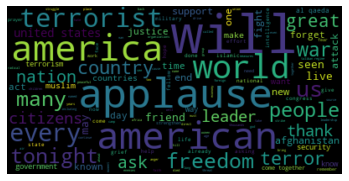

In [16]:
# Generate wordcloud
wordcloud_bush = WordCloud().generate(bush_nohtml)
plt.imshow(wordcloud_bush, interpolation='bilinear')
plt.axis("off")
plt.savefig("bushwc.eps", dpi = 300)
plt.show()

In [17]:
# Save filtered speech tokens
%store bush_nohtml_filtered

Stored 'bush_nohtml_filtered' (list)


## 9/11 Commission Report

In [18]:
# Create vector for commission report
commission = []

# Iterate through 13 chapters of commission report and append
for i in range(13):
    url = "https://govinfo.library.unt.edu/911/report/911Report_Ch" + str(i+1) + ".htm"
    response = request.urlopen(url)
    raw = response.read().decode('latin1')
    commission.append(raw)
    
# Create single string  
string_commission = '\n'.join(commission)

In [19]:
# Clean rport by removing html characters, grammar, and setting to lowercase
commission_nohtml = BeautifulSoup(string_commission, "lxml").text
commission_nohtml = re.sub(r'[^\w\s]','',commission_nohtml)
commission_nohtml = commission_nohtml.lower()

In [20]:
# Export as text file
with open("911report_commission.txt", "wt") as output:
    output.write(commission_nohtml)

In [21]:
# Tokenize commission report
commission_tokens = word_tokenize(commission_nohtml)

In [22]:
# Calculate word frequencies of commission report and print top 20
commission_fdist = FreqDist(commission_tokens)
commission_fdist.most_common(20)

[('the', 1606),
 ('to', 573),
 ('and', 443),
 ('of', 438),
 ('that', 309),
 ('in', 301),
 ('was', 298),
 ('a', 298),
 ('at', 296),
 ('had', 205),
 ('center', 170),
 ('aircraft', 167),
 ('on', 146),
 ('flight', 140),
 ('it', 135),
 ('faa', 135),
 ('not', 129),
 ('were', 126),
 ('american', 126),
 ('from', 125)]

In [23]:
# Remove stop words
commission_nohtml_filtered = [w for w in commission_tokens if not w.lower() in stop_words]

In [24]:
# Recalculate word frequencies of commission report and print top 20
commission_nohtml_fdist = FreqDist(commission_nohtml_filtered)
commission_nohtml_fdist.most_common(20)

[('center', 170),
 ('aircraft', 167),
 ('flight', 140),
 ('faa', 135),
 ('american', 126),
 ('united', 121),
 ('president', 100),
 ('neads', 81),
 ('11', 77),
 ('air', 76),
 ('command', 68),
 ('93', 67),
 ('one', 64),
 ('new', 61),
 ('vice', 61),
 ('hijacked', 59),
 ('military', 57),
 ('would', 55),
 ('washington', 55),
 ('boston', 53)]

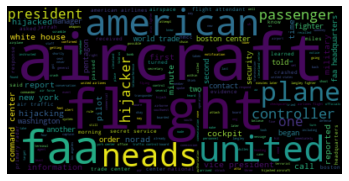

In [25]:
# Generate wordcloud
wordcloud_commission = WordCloud().generate(commission_nohtml)
plt.imshow(wordcloud_commission, interpolation='bilinear')
plt.axis("off")
plt.savefig("cpwc.eps", dpi = 300)
plt.show()

In [26]:
# Save filtered report tokens
%store commission_nohtml_filtered

Stored 'commission_nohtml_filtered' (list)
